In [9]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








#beta_rel = 0.305
beta_rel = 0.106

#gamma = 1.050
gamma = 1.006


I=0.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
B = 0.060 # T for LEIR
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T





beta_x=10 
beta_y=4
emittance=10*1e-6





num_particles=int(1e0)



In [10]:
#Magnetic field strength

B_values=np.linspace(1e-3,5e-2,100)

rhomin_list=[]
rhomax_list=[]
rho_L_list=[]
force_list=[]


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=1e-10,
    px=1e-3,
    y=0,
    py=0,
    delta=0,
    zeta=0)

for B_loop in B_values:

 




    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                    T_perp=T_perp,T_l=T_l,
                                                    B=B_loop,Z=Z,B_ratio=0,
                                                    Neutralisation_space_charge=0,Neutralisation_rotation=0)


    impact_param=dtk_cooler.impact_parameters(dtk_particle)   
    rhomin,rhomax,rho_L=impact_param

    force=dtk_cooler.force(dtk_particle)   


    rhomin_list.append(rhomin)
    rhomax_list.append(rhomax)
    rho_L_list.append(rho_L)
    force_list.append(-force)


    

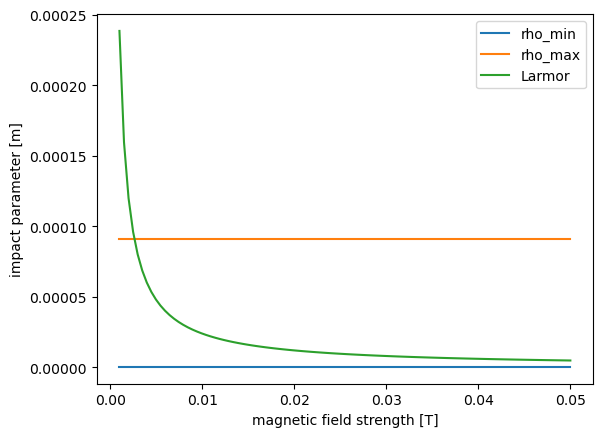

In [11]:
plt.figure()
plt.plot(B_values,rhomin_list,label='rho_min')
plt.plot(B_values,rhomax_list,label='rho_max')
plt.plot(B_values,rho_L_list,label='Larmor')
plt.ylabel('impact parameter [m]')
plt.xlabel('magnetic field strength [T]')
plt.legend()
plt.show()

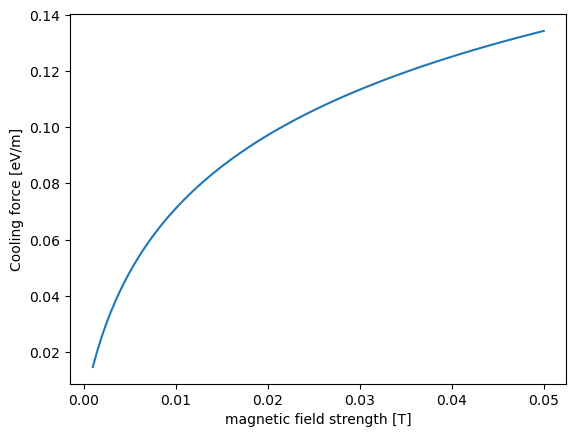

In [12]:
plt.figure()
plt.plot(B_values,force_list)
plt.ylabel("Cooling force [eV/m]")
plt.xlabel('magnetic field strength [T]')

plt.show()